In [15]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural net , activation function
# loss and optimizer
# training loop (batch training)
# model evalution
# GPU support

In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [17]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
# hyper parameters
input_size = 784  # 28 x 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [19]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle =True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle =False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


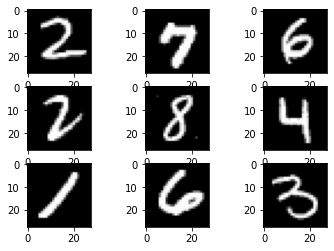

In [20]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(samples[i][0],cmap = 'gray')
plt.show()

In [21]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)


  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [23]:
model = NeuralNet(input_size, hidden_size,num_classes)

In [24]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [42]:
# training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100 1 28 28
    # 100 784

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, steps {i+1}/{n_total_steps}, loos = {loss.item():.4f}')


# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
     # value ,index
    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

acc = 100.0 * (n_correct / n_samples)
print(".........Finished Training...............")
print(f'accuracy={acc:.3f} %')

epoch 1 / 2, steps 100/600, loos = 0.0221
epoch 1 / 2, steps 200/600, loos = 0.0127
epoch 1 / 2, steps 300/600, loos = 0.0175
epoch 1 / 2, steps 400/600, loos = 0.0091
epoch 1 / 2, steps 500/600, loos = 0.0308
epoch 1 / 2, steps 600/600, loos = 0.0126
epoch 2 / 2, steps 100/600, loos = 0.0207
epoch 2 / 2, steps 200/600, loos = 0.0218
epoch 2 / 2, steps 300/600, loos = 0.0119
epoch 2 / 2, steps 400/600, loos = 0.0370
epoch 2 / 2, steps 500/600, loos = 0.0143
epoch 2 / 2, steps 600/600, loos = 0.0229
.........Finished Training...............
accuracy=97.780 %
